<a href="https://colab.research.google.com/github/ShrutiJain456/Encrypted/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Import basic libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

2.  Import and read the dataset

In [44]:
df = pd.read_csv("/content/Dataset.txt", sep = '\t')

3. EDA

In [45]:
df.shape

(101180, 24)

Our dataset comprises of 101180 rows and 24 columns. Since the features are encrypted there is no need to read the column names. Lets observe the class distribution.

In [46]:
class_dist = df['C'].value_counts()
print(class_dist)

C
0    76353
1    24827
Name: count, dtype: int64


In [47]:
df.head()

,Index,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21,F22,C
0,1,0.224506,0.500340,0.489860,0.902413,7934,-6970,-5714,9982,-5697,4227810299,-3918676258,316195953,6176861823,-3433637453,10/4/1986,9/6/1992,2,1,706,305,1,2,0
1,2,0.321128,0.281119,0.907283,0.772159,-8238,1219,1663,1287,-3658,-1146724819,-6837090439,1378635942,-9031507610,609277486,2/24/1979,1/5/1983,1,1,423,206,18,7,1
2,3,0.893441,0.622005,0.998776,0.098386,8540,5266,-9377,-3504,-4511,5947184989,6881163164,-9921889287,-5610051842,-8977995005,1/12/1989,11/22/1986,2,1,703,315,1,4,0
3,4,0.320641,0.957234,0.346000,0.646479,-7772,-383,9681,-8661,3474,-5724795826,-6014104498,6550322883,-4697085930,4868760308,2/18/1982,6/10/1992,1,1,122,304,15,1,0
4,5,0.475961,0.623008,0.544988,0.159709,1571,-8039,-7961,-2385,4407,-3097637172,-9755731483,759031103,9984692447,9757408267,4/10/1987,10/19/1985,1,1,486,240,1,1,0


separate the date columns from numerical ones

In [48]:
df.drop('Index', axis=1, inplace=True)

In [9]:
df.isnull().sum()

,0
F1,0
F2,0
F3,0
F4,0
F5,0
F6,0
F7,0
F8,0
F9,0
F10,0


In [10]:
df.dtypes

,0
F1,float64
F2,float64
F3,float64
F4,float64
F5,int64
F6,int64
F7,int64
F8,int64
F9,int64
F10,int64


In [49]:
num_cols = df.select_dtypes(include =['float64', 'int64']).columns
date_cols = df.select_dtypes(include = ['object']).columns

In [50]:
print(num_cols, date_cols)

Index(['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11',
       'F12', 'F13', 'F14', 'F17', 'F18', 'F19', 'F20', 'F21', 'F22', 'C'],
      dtype='object') Index(['F15', 'F16'], dtype='object')


In [51]:
pd.set_option('display.max_columns', None)

In [14]:
stats_summary = df[num_cols].describe()
stats_summary

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F17,F18,F19,F20,F21,F22,C
count,101180.000000,101180.000000,101180.000000,101180.000000,101180.000000,101180.000000,101180.000000,101180.000000,101180.000000,1.011800e+05,1.011800e+05,1.011800e+05,1.011800e+05,1.011800e+05,101180.000000,101180.000000,101180.000000,101180.000000,101180.000000,101180.000000,101180.000000
mean,0.502348,0.501497,0.499886,0.499839,-29.742617,1.511000,7.939118,16.434147,9.927812,1.869749e+07,-7.052456e+06,6.921685e+06,1.127538e+07,-5.198163e+07,1.339593,1.335027,387.181479,387.333999,4.588031,4.598567,0.245375
std,0.288058,0.289017,0.288875,0.288729,5781.829379,5796.594007,5765.581875,5782.805211,5771.004738,5.769064e+09,5.779111e+09,5.771750e+09,5.786659e+09,5.782358e+09,0.894065,0.882435,235.939585,235.374285,4.775671,4.776494,0.430311
min,0.000018,0.000004,0.000002,0.000006,-10000.000000,-10000.000000,-10000.000000,-10000.000000,-10000.000000,-9.999816e+09,-9.999804e+09,-9.999754e+09,-9.999852e+09,-9.999767e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,0.253819,0.251115,0.248818,0.250501,-5045.000000,-5012.000000,-4979.000000,-4988.000000,-4992.250000,-4.966961e+09,-4.994511e+09,-4.991278e+09,-5.027003e+09,-5.070403e+09,1.000000,1.000000,187.000000,187.000000,1.000000,1.000000,0.000000
50%,0.501802,0.501095,0.499820,0.501387,-46.000000,-11.500000,16.500000,60.000000,22.500000,4.346691e+07,-5.477172e+07,4.277384e+07,9.416236e+06,-8.816174e+07,1.000000,1.000000,374.000000,375.000000,3.000000,3.000000,0.000000
75%,0.753598,0.752404,0.750281,0.748803,4978.000000,5050.000000,4962.000000,5021.000000,5020.000000,5.019440e+09,4.994296e+09,5.008238e+09,5.032947e+09,4.947133e+09,1.000000,1.000000,560.000000,561.000000,7.000000,7.000000,0.000000
max,0.999986,0.999990,0.999985,0.999977,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,9.999497e+09,9.999897e+09,9.999555e+09,9.999951e+09,9.999997e+09,6.000000,6.000000,901.000000,901.000000,21.000000,21.000000,1.000000


In [15]:
corr_mat  = df[num_cols].corr()
corr_mat

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F17,F18,F19,F20,F21,F22,C
F1,1.000000,0.004133,-0.000362,-0.000068,0.002246,-0.004772,-0.002282,0.004885,-0.003566,-0.000542,0.000370,-0.000173,-0.001954,-0.000280,0.002261,-0.000322,0.005119,0.000737,0.003524,0.001905,-0.003222
F2,0.004133,1.000000,0.002162,-0.002540,0.000784,-0.001918,0.007180,0.001264,-0.001359,0.003328,0.003369,0.000495,-0.000195,0.003321,-0.003455,0.000010,-0.000049,-0.003102,0.000882,0.000089,-0.025360
F3,-0.000362,0.002162,1.000000,-0.001951,0.004431,0.003048,-0.002919,0.002998,-0.000022,0.000009,0.000893,0.001373,-0.002150,0.002402,0.000770,-0.003763,-0.001752,-0.001445,-0.000393,-0.001722,0.002111
F4,-0.000068,-0.002540,-0.001951,1.000000,-0.001021,0.002239,0.002765,-0.003080,0.000362,0.001897,-0.003646,0.005809,0.001284,0.001984,-0.006168,-0.004088,-0.002143,-0.002606,-0.002783,-0.002746,0.039255
F5,0.002246,0.000784,0.004431,-0.001021,1.000000,-0.001416,-0.001278,0.002407,0.001892,-0.001449,0.000282,0.001567,0.001665,0.001270,0.001536,-0.006480,-0.000906,-0.003904,-0.006321,-0.000606,0.001055
F6,-0.004772,-0.001918,0.003048,0.002239,-0.001416,1.000000,0.001841,0.006144,0.002759,0.003075,-0.001831,0.000029,0.005518,-0.002566,-0.001148,0.000021,0.001801,-0.001902,0.006707,-0.002640,0.002274
F7,-0.002282,0.007180,-0.002919,0.002765,-0.001278,0.001841,1.000000,0.003645,0.001188,-0.003711,0.005499,0.008532,0.003066,-0.000018,-0.001467,-0.003077,-0.003939,-0.002556,0.001802,0.000369,0.000865
F8,0.004885,0.001264,0.002998,-0.003080,0.002407,0.006144,0.003645,1.000000,0.002951,-0.002059,-0.001784,0.000336,0.001144,-0.002781,-0.000708,0.003779,-0.005989,0.004048,-0.001097,0.000933,-0.001022
F9,-0.003566,-0.001359,-0.000022,0.000362,0.001892,0.002759,0.001188,0.002951,1.000000,0.002106,0.000353,-0.006048,0.009820,-0.001832,-0.004533,-0.001911,-0.004429,-0.002459,0.002288,-0.001670,0.004590
F10,-0.000542,0.003328,0.000009,0.001897,-0.001449,0.003075,-0.003711,-0.002059,0.002106,1.000000,0.009194,0.004268,-0.002094,0.000715,-0.000384,-0.002590,0.001890,-0.003524,-0.001734,0.000549,0.008301


let's visualise these correlations for better understanding

a.class distribution

<Figure size 1500x1000 with 0 Axes>

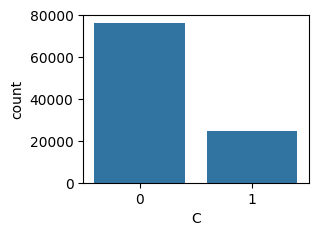

<Figure size 1500x1000 with 0 Axes>

In [16]:
plt.subplot(2,2,1)
sns.countplot(data = df, x='C')
plt.figure(figsize = (15,10))

<Axes: >

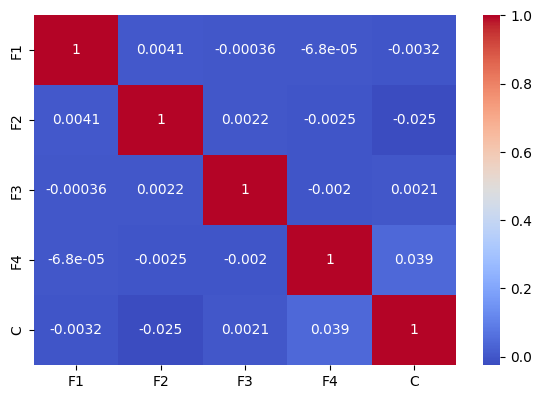

In [17]:
plt.figure(figsize = (15,10))
plt.subplot(2,2,4)
selected_feat =  ['F1',"F2", "F3", "F4", "C"]
sns.heatmap(corr_mat.loc[selected_feat, selected_feat], annot = True , cmap = 'coolwarm')


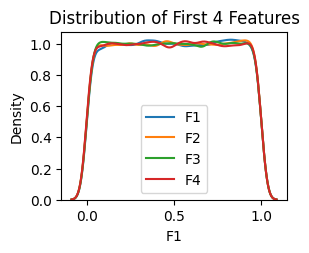

In [18]:
plt.subplot(2, 2, 3)
for i, col in enumerate(['F1', 'F2', 'F3', 'F4']):
        sns.kdeplot(data=df, x=col, label=col)
        plt.title('Distribution of First 4 Features')
        plt.legend()

In [52]:
df['F15'] = pd.to_datetime(df['F15'])
df['F16'] = pd.to_datetime(df['F16'])

In [32]:

df['F15_Year'] = df['F15'].dt.year
df['F15_Month'] = df['F15'].dt.to_period("M")
df['F15_Week'] = df['F15'].dt.to_period("W")

df['F16_Year'] = df['F16'].dt.year
df['F16_Month'] = df['F16'].dt.to_period("M")
df['F16_Week'] = df['F16'].dt.to_period("W")

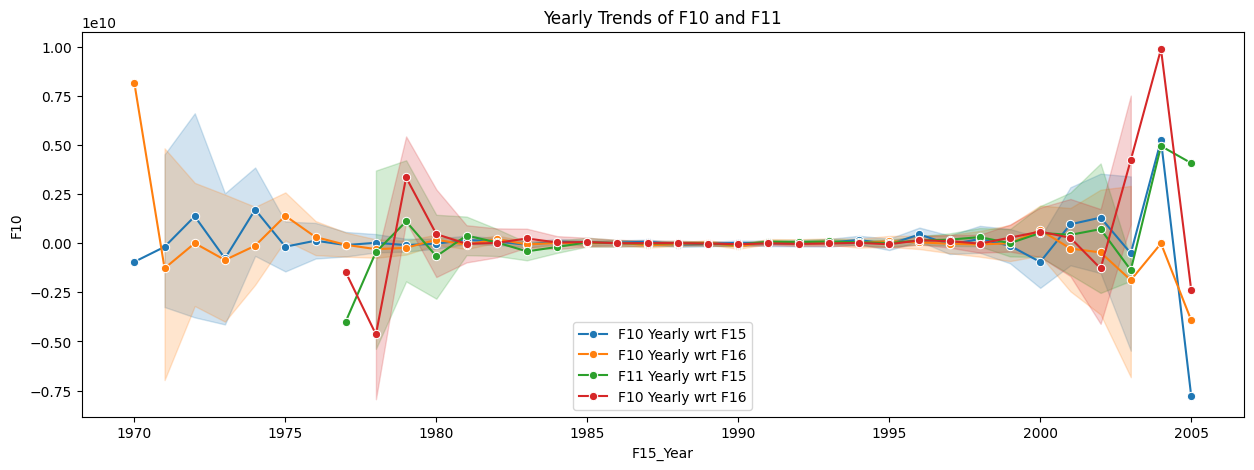

In [28]:
plt.figure(figsize=(15, 5))
sns.lineplot(x='F15_Year', y='F10', data=df, marker='o', label="F10 Yearly wrt F15")
sns.lineplot(x='F15_Year', y='F11', data=df, marker='o', label="F10 Yearly wrt F16")
sns.lineplot(x='F16_Year', y='F10', data=df, marker='o', label="F11 Yearly wrt F15")
sns.lineplot(x='F16_Year', y='F11', data=df, marker='o', label="F10 Yearly wrt F16")
plt.title("Yearly Trends of F10 and F11")
plt.legend()
plt.show()

In [53]:
df['Month_F15'] = df['F15'].dt.month
df["Month_f16"] = df['F16'].dt.month


In [54]:
monthly_trends01 = df.groupby("Month_F15").mean()

<Axes: xlabel='Month_F15', ylabel='F10'>

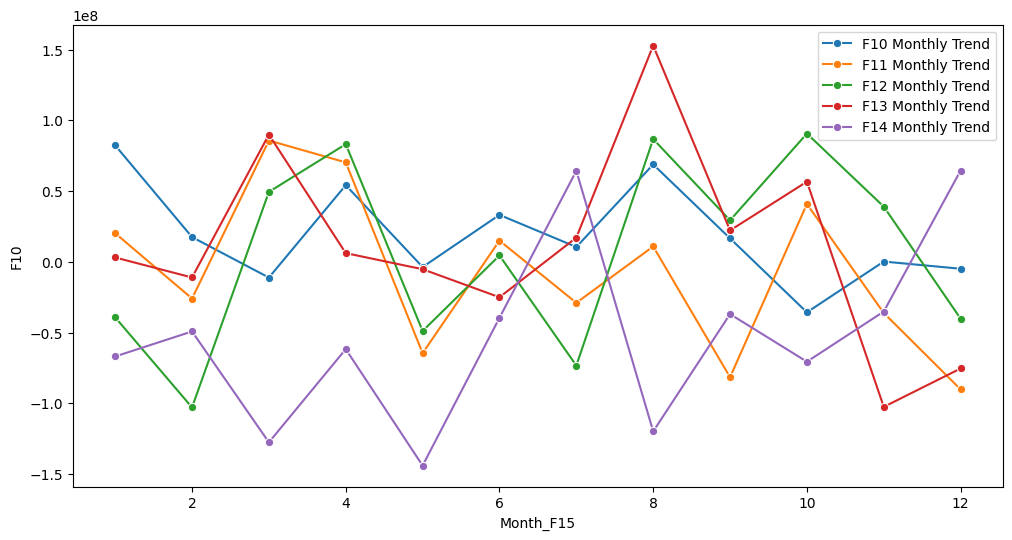

In [55]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_trends01.index, y=monthly_trends01['F10'], marker='o', label="F10 Monthly Trend")
sns.lineplot(x=monthly_trends01.index, y=monthly_trends01['F11'], marker='o', label="F11 Monthly Trend")
sns.lineplot(x=monthly_trends01.index, y=monthly_trends01['F12'], marker='o', label="F12 Monthly Trend")
sns.lineplot(x=monthly_trends01.index, y=monthly_trends01['F13'], marker='o', label="F13 Monthly Trend")
sns.lineplot(x=monthly_trends01.index, y=monthly_trends01['F14'], marker='o', label="F14 Monthly Trend")

In [57]:
df["DayOfWeek"] = df["F15"].dt.dayofweek

In [58]:
day_map = {0: "Monday", 1: "Tuesday", 2: "Wednesday", 3: "Thursday", 4: "Friday", 5: "Saturday", 6: "Sunday"}
df["DayName"] = df["DayOfWeek"].map(day_map)

In [59]:

selected_features = ["F10", "F11", "F12", "F13", 'F14']

weekly_trends = df.groupby("DayName")[selected_features].mean().reset_index()

weekly_trends["DayOfWeek"] = weekly_trends["DayName"].map(day_map)
weekly_trends = weekly_trends.sort_values("DayOfWeek")

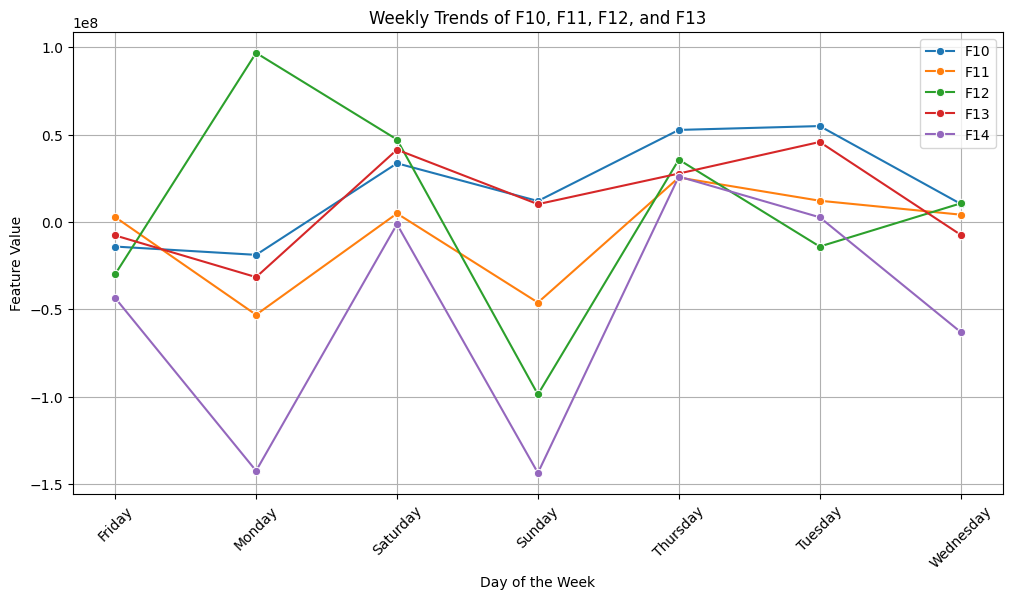

In [60]:
plt.figure(figsize=(12, 6))
for feature in selected_features:
    sns.lineplot(x=weekly_trends["DayName"], y=weekly_trends[feature], label=feature, marker="o")

plt.title("Weekly Trends of F10, F11, F12, and F13")
plt.xlabel("Day of the Week")
plt.ylabel("Feature Value")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

In [61]:
feature_groups = {
        'probability_features': ['F1', 'F2', 'F3', 'F4'],
        'integer_features': ['F5', 'F6', 'F7', 'F8', 'F9'],
        'large_integer_features': ['F10', 'F11', 'F12', 'F13', 'F14'],
        'categorical_features': ['F17', 'F18', 'F21', 'F22'],
        'numeric_features': ['F19', 'F20']
    }

In [62]:
cat_cols = ['F17', 'F18', 'F21', 'F22']
for col in cat_cols:
    print(f"\nValue counts for {col}:")
    print(df[col].value_counts().sort_index())
    print("\nValue counts (normalized):")
    print(df[col].value_counts(normalize=True).sort_index())


Value counts for F17:
F17
1    81320
2    13536
3     2426
4     1759
6     2139
Name: count, dtype: int64

Value counts (normalized):
F17
1    0.803716
2    0.133781
3    0.023977
4    0.017385
6    0.021141
Name: proportion, dtype: float64

Value counts for F18:
F18
1    81432
2    13484
3     2436
4     1799
6     2029
Name: count, dtype: int64

Value counts (normalized):
F18
1    0.804823
2    0.133267
3    0.024076
4    0.017780
6    0.020053
Name: proportion, dtype: float64

Value counts for F21:
F21
1     41565
2      8157
3      7229
4      7022
5      5912
6      5138
7      4548
8      3822
9      3201
10     3261
11     2835
12     1285
13     1224
14      910
15      650
16      538
17      319
18      266
19      249
20      242
21     2807
Name: count, dtype: int64

Value counts (normalized):
F21
1     0.410803
2     0.080619
3     0.071447
4     0.069401
5     0.058431
6     0.050781
7     0.044950
8     0.037774
9     0.031637
10    0.032230
11    0.028019
12    0.0127

In [63]:
feature_counts = {
    "F17": {1: 81320, 2: 13536, 3: 2426, 4: 1759, 6: 2139},
    "F18": {1: 81432, 2: 13484, 3: 2436, 4: 1799, 6: 2029},
    "F21": {1: 41565, 2: 8157, 3: 7229, 4: 7022, 5: 5912, 6: 5138, 7: 4548, 8: 3822, 9: 3201, 10: 3261, 11: 2835, 12: 1285, 13: 1224, 14: 910, 15: 650, 16: 538, 17: 319, 18: 266, 19: 249, 20: 242, 21: 2807},
    "F22": {1: 41408, 2: 8048, 3: 7198, 4: 7103, 5: 6069, 6: 5246, 7: 4519, 8: 3818, 9: 3167, 10: 3273, 11: 2802, 12: 1319, 13: 1184, 14: 1004, 15: 637, 16: 526, 17: 278, 18: 262, 19: 221, 20: 226, 21: 2872}
}

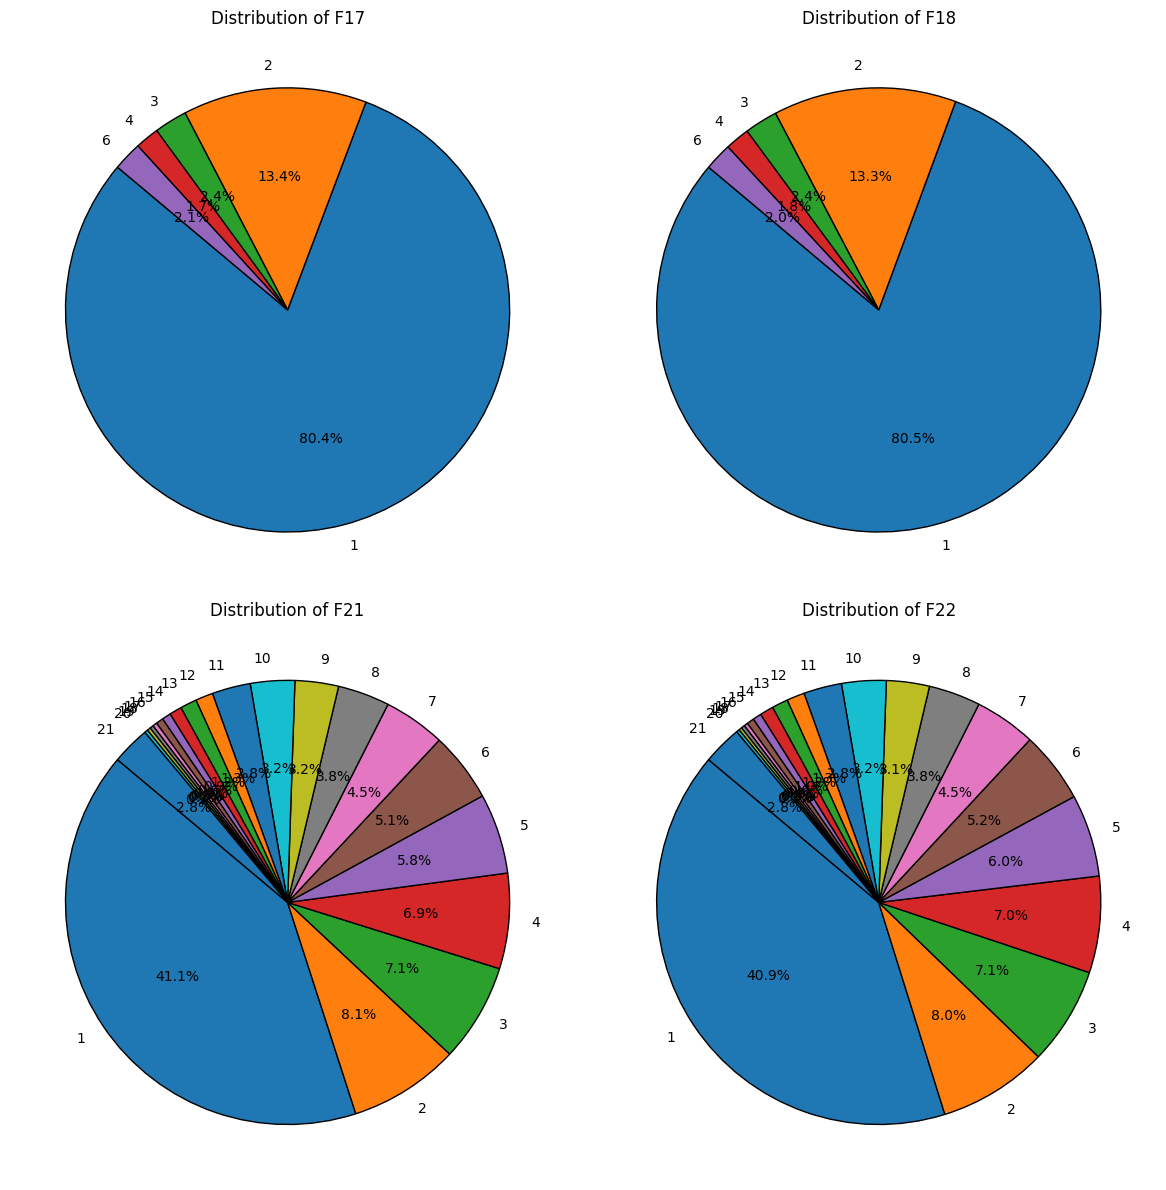

In [64]:
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

for ax, feature in zip(axes.flatten(), cat_cols):
    data = feature_counts[feature]
    labels = [f"{key}" for key in data.keys()]
    sizes = list(data.values())

    ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'black'})
    ax.set_title(f"Distribution of {feature}")

plt.tight_layout()
plt.show()

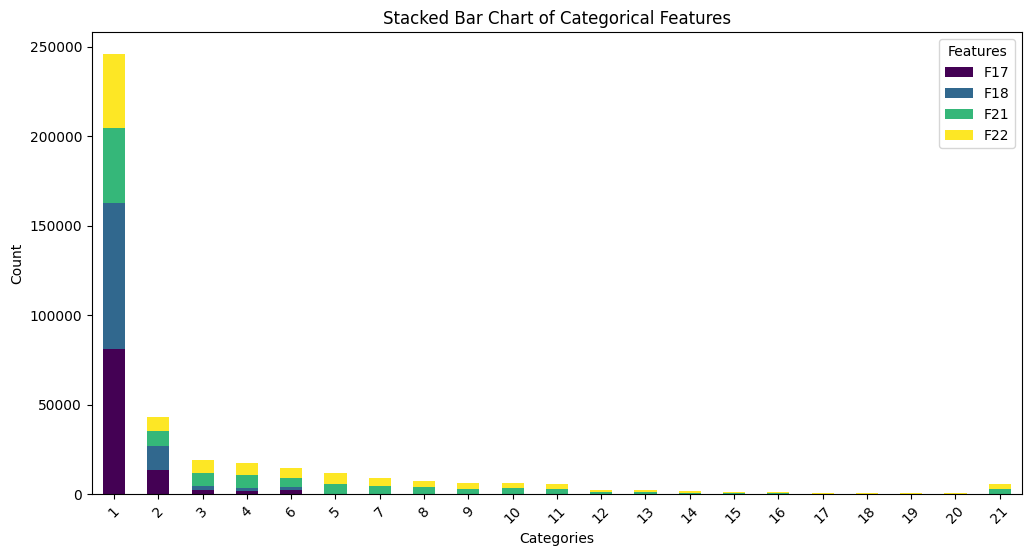

In [65]:
df_counts = pd.DataFrame(feature_counts)
df_counts.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="viridis")

plt.title("Stacked Bar Chart of Categorical Features")
plt.xlabel("Categories")
plt.ylabel("Count")
plt.legend(title="Features")
plt.xticks(rotation=45)
plt.show()

In [66]:
num_cols = ['F1', 'F6', 'F11', 'F14']

In [67]:
df_viz = df.copy()

In [69]:
from sklearn.feature_selection import mutual_info_classif

X_numeric = df_viz.select_dtypes(include=['float64', 'int64']).drop(['C'], axis = 1)

mi_scores = mutual_info_classif(X_numeric, df_viz['C'])
feature_importance = pd.Series(mi_scores, index=X_numeric.columns)

Text(0.5, 1.0, 'Feature Importance (Mutual Information)')

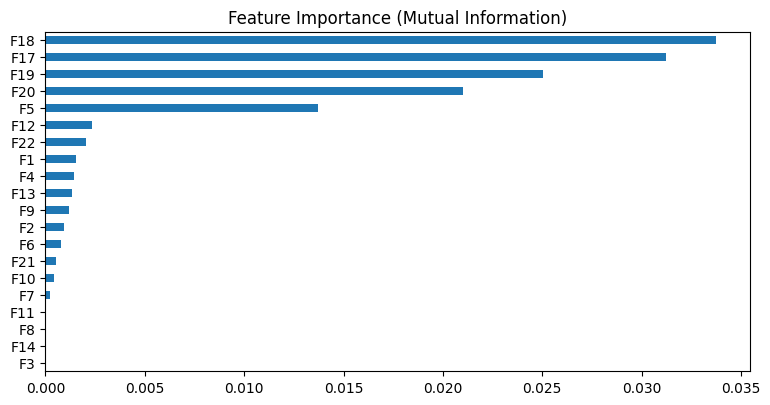

In [70]:
plt.figure(figsize=(20, 15))
plt.subplot(3, 2, 1)
feature_importance.sort_values(ascending=True).plot(kind='barh')
plt.title('Feature Importance (Mutual Information)')

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
df.columns

Index(['index', 'Index', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9',
       'F10', 'F11', 'F12', 'F13', 'F14', 'F15', 'F16', 'F17', 'F18', 'F19',
       'F20', 'F21', 'F22', 'C', 'Days_F15', 'Days_F16'],
      dtype='object')

In [ ]:
df.drop(['index','Index'], axis =1, inplace = True)

In [ ]:
X = df.drop(['C','F15', 'F16'],axis=1)
y = df['C']

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)